## Regression using ANN

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

In [0]:
def split(df, train_ratio):
    idx = int(np.round(len(df)*0.7))
    shuffled_df = df.sample(frac = 1).reset_index(drop = True)
    train = shuffled_df[0:idx]
    test = shuffled_df[idx:len(df)]
    assert(len(train) + len(test)==len(df))
    return train, test

In [0]:
def plots(h_dict, val = True):
    
    plt.figure()
    for num_layers in h_dict.keys():
        print(h_dict[num_layers].history.keys())
        plt.plot(h_dict[num_layers].history['loss'], label = 'train %0.f layers'%num_layers)
        if(val):
            plt.plot(h_dict[num_layers].history['val_loss'], label = "validation %.0f layers"%num_layers)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc = 0)
    plt.grid()
    plt.show()
    
    plt.figure()
    for num_layers in h_dict.keys():
        print(h_dict[num_layers].history.keys())
        plt.plot(h_dict[num_layers].history['mean_squared_error'], label = 'train %0.f layers'%num_layers)
        if(val):
            plt.plot(h_dict[num_layers].history['val_mean_squared_error'], label = "validation %.0f layers"%num_layers)

    plt.title('model mean_squared_error')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(loc = 0)
    plt.grid()
    plt.show()
    
    plt.figure()
    for num_layers in h_dict.keys():
        print(h_dict[num_layers].history.keys())
        plt.plot(h_dict[num_layers].history['mean_absolute_error'], label = 'train %0.f layers'%num_layers)
        if(val):
            plt.plot(h_dict[num_layers].history['val_mean_absolute_error'], label = "validation %.0f layers"%num_layers)

    plt.title('model mean_absolute_error')
    plt.ylabel('MAE')
    plt.xlabel('epoch')
    plt.legend(loc = 0)
    plt.grid()
    plt.show()

In [0]:
def ANN(data, hidden_layers, nodes, epochs, activation_fn, metric, validation):
    [x_train, y_train, x_test, y_test] = data
    print(hidden_layers,"hidden layers with", activation_fn, "activation and", nodes,"nodes.\n")
    
    model = Sequential()
    model.add(Dense(nodes[0], activation = activation_fn, input_shape = [x_train.shape[1]]))
   
    for i in range(1, hidden_layers):

        model.add(Dense(nodes[i], activation = activation_fn))
        
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=metric)
    fit_history = model.fit(x_train, y_train, epochs=epochs, validation_split=validation, verbose = False)
    print(model.summary(), "\n")
    print(model.evaluate(x_test, y_test, verbose = True), "\n")
    
    return fit_history

## get data

In [0]:
cols = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df = pd.read_csv("auto-mpg.data", sep = "\s+", names = cols)
df = df.drop(cols[-1], axis = 1)
df = df.replace('?', np.nan)
df = df.dropna().astype('float32')
one_hot = pd.get_dummies(df['origin'])
df = pd.concat([df, one_hot], axis = 1)
df = df.drop('origin', axis = 1)
features = len(df.columns)
samples = len(df)
print("Samples = ", samples, ", features = ", features)
df.head()


Samples =  392 , features =  10


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1.0,2.0,3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


## split and normalize data

In [0]:
train_df, test_df = split(df, 0.7)
y_train = train_df['mpg'].to_numpy().reshape(len(train_df),1)
y_test = test_df['mpg'].to_numpy().reshape(len(test_df),1)

x_train = train_df.drop('mpg', axis=1).to_numpy()
x_test = test_df.drop('mpg', axis=1).to_numpy()
x_train = (x_train - np.mean(x_train, axis = 0))/np.std(x_train, axis = 0)
x_test = (x_test - np.mean(x_test, axis = 0))/np.std(x_test, axis = 0)

assert(x_train.shape[0]+x_test.shape[0] == y_train.shape[0]+y_test.shape[0] == samples)
assert(x_train.shape[1]+y_train.shape[1] == x_test.shape[1]+y_test.shape[1] == features)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(274, 9) (274, 1)
(118, 9) (118, 1)


In [0]:
# layers = np.array([1, 3, 5, 7])
layers = [2]
h = dict.fromkeys(layers)
data = [x_train, y_train, x_test, y_test]
for num_layers in h:
    print("*"*100, "\n\n")
    h[num_layers] = ANN(data, num_layers, [64]*num_layers, 100, 'relu', \
                        ['mean_squared_error','mean_absolute_error'], 0.3)

**************************************************************************************************** 


2 hidden layers with relu activation and [64, 64] nodes.

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
None 

118/118 [==============================] - 0s 33us/sample - loss: 14.4582 - mean_squared_error: 14.4582 - mean_absolute_error: 2.6095
[14.458155842150672, 14.458156, 2.6094923] 



dict_keys(['mean_squared_error', 'val_mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'mean_absolute_error', 'loss'])


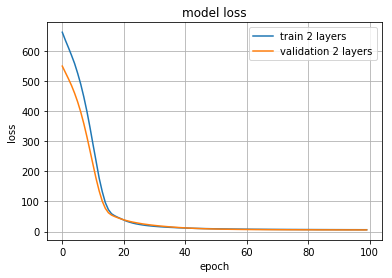

dict_keys(['mean_squared_error', 'val_mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'mean_absolute_error', 'loss'])


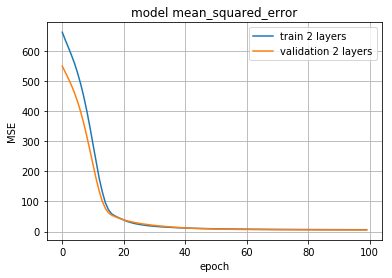

dict_keys(['mean_squared_error', 'val_mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'mean_absolute_error', 'loss'])


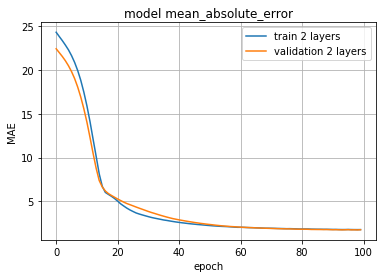

In [0]:
plots(h, 1)